In [6]:
import kaggle

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()
api.competition_download_file('time-series-classification-part-1','ETTh1_without_missing.csv')

ETTh1_without_missing.csv: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import csv
def partionnage(chemin):
    row=[]
    with open(chemin, 'r') as file:
        i=0
        reader = csv.reader(file, delimiter=';')
        new_row={}
        for row in reader:
            if(i!=0):
                temp_dic={}
                temp_dic["date"]=(row[0].split(","))[1].split(" ")[0]
                temp_dic["heure"]=int((row[0].split(","))[1].split(" ")[1].split(":")[0])
                temp_dic["OT"]=float((row[0].split(","))[2])
                new_row[int((row[0].split(","))[0])]=temp_dic
            i=i+1
        return new_row
    

data=partionnage('ETTh1_without_missing.csv')



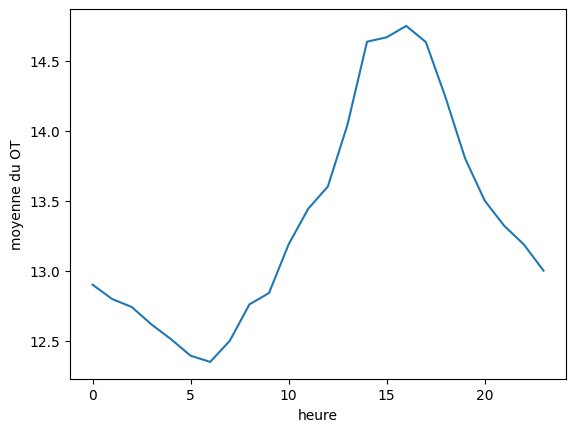

In [8]:
import matplotlib.pyplot as plt

def meanByHour(data):
    numberOfHours=[0 for i in range(0,24)]
    OTmean=[0 for i in range(0,24)]
    i=0
    for i,k in data.items():
        numberOfHours[k["heure"]]=numberOfHours[k["heure"]]+1
        OTmean[k["heure"]]=OTmean[k["heure"]]+k["OT"]    
    return [j / i for j, i in zip(OTmean, numberOfHours)]



meanByHour(data)
def graph(data):
    plt.plot([i for i in range(0,24)],meanByHour(data))
    plt.xlabel('heure')
    plt.ylabel('moyenne du OT')
    plt.show()
    
graph(data)



721.0


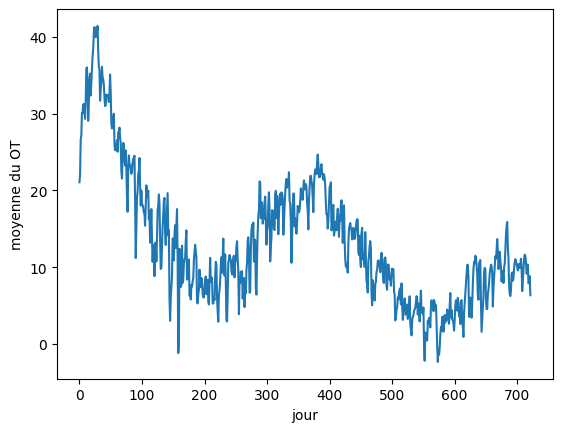

In [9]:
def meanByDay(data):
    print((len(data)-16)/24)
    OTmean=[0 for i in range(int((len(data)-16)/24)+1)]
    numberOfDay=0
    hour=0
    for i,k in data.items():
        
        OTmean[numberOfDay]=OTmean[numberOfDay]+k["OT"]
        hour=hour+1
        if(hour==24):
            hour=0
            OTmean[numberOfDay]=OTmean[numberOfDay]/24
            numberOfDay=numberOfDay+1
    OTmean[len(OTmean)-1]=OTmean[len(OTmean)-1]/16
    return OTmean


def graph2(data):
    AllDay=[i for i in range(722)]
    plt.plot(AllDay,meanByDay(data))
    plt.xlabel('jour')
    plt.ylabel('moyenne du OT')
    plt.show()

graph2(data)

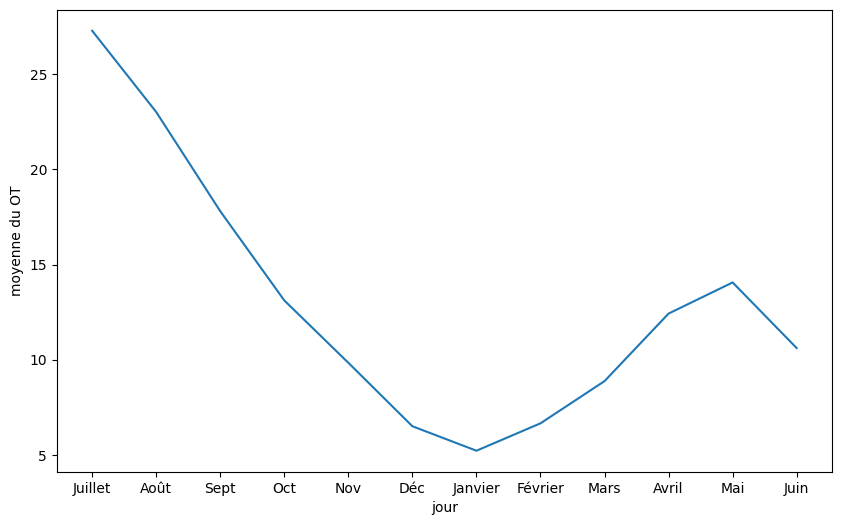

In [12]:
def meanByMonth(data):
    OTmean=[0 for i in range(int((len(data)-16)/(24*31))+1)]
    numberOfDay=0
    month=0
    for i,k in data.items():
        OTmean[numberOfDay]=OTmean[numberOfDay]+k["OT"]
        month=month+1
        if(month==24*31):
            month=0
            OTmean[numberOfDay]=OTmean[numberOfDay]/(24*31)
            numberOfDay=numberOfDay+1
    OTmean[len(OTmean)-1]=OTmean[len(OTmean)-1]/((24*31)+16)
    OTmonth=[0 for i in range(12)]
    for i in range(0,12):
        OTmonth[i]=(OTmean[i]+OTmean[i+12])/2
    return OTmonth


def graphOTbyMonth(data):
    plt.figure(figsize=(10, 6))  
    AllMonth=[
    "Juillet",
    "Août",
    "Sept",
    "Oct",
    "Nov",
    "Déc",
    "Janvier",
    "Février",
    "Mars",
    "Avril",
    "Mai",
    "Juin"
]
    plt.plot(AllMonth,meanByMonth(data))
    plt.xlabel('jour')
    plt.ylabel('moyenne du OT')
    plt.show()

graphOTbyMonth(data)